In [1]:
# STUDYING 'BOUT BI/MULIT VARITATE ANALYSIS

In [ ]:
import pandas as pd
import seaborn as sns

In [63]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [64]:
titanic = pd.read_csv('tested.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
iris = sns.load_dataset('iris')

In [66]:
flights = sns.load_dataset('flights')

# WHEN IN THE GIVEN DATASET BOTH COLS ARE NUMERCIAL

<Axes: xlabel='Age', ylabel='Fare'>

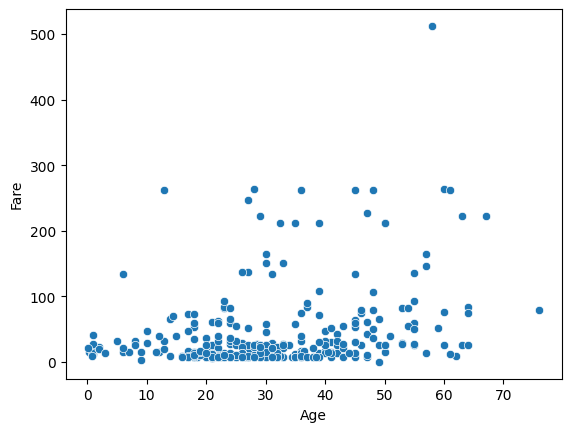

In [68]:
sns.scatterplot(x=titanic['Age'],y=titanic['Fare'])

<Axes: xlabel='total_bill', ylabel='tip'>

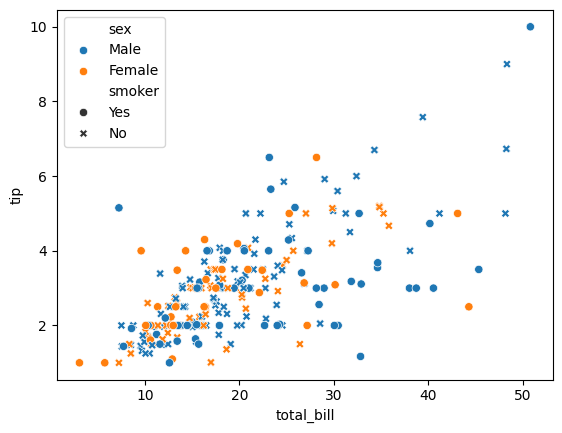

In [69]:
sns.scatterplot(x=tips['total_bill'],y=tips['tip'],hue=tips['sex'],style=tips['smoker'])

In [70]:
# Lineplot
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


# new = flights.groupby('year').sum().reset_index()
# The 'month' column in your output seems incorrect because when using .sum(), non-numeric columns are usually dropped or ignored. 
# The correct result should look something like this:

In [72]:
new = flights.groupby('year', as_index=False)['passengers'].sum()
new

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


<Axes: xlabel='year', ylabel='passengers'>

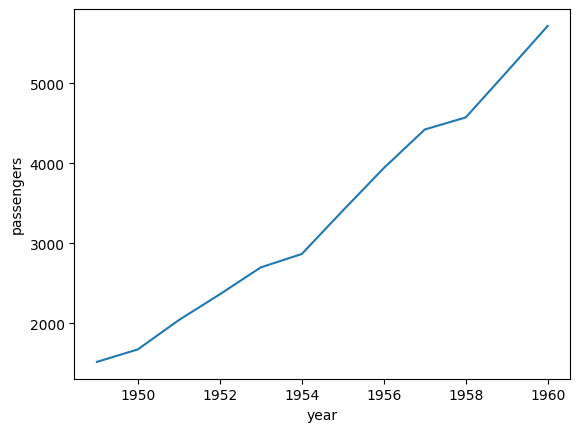

In [73]:
sns.lineplot(x=new['year'],y=new['passengers'])

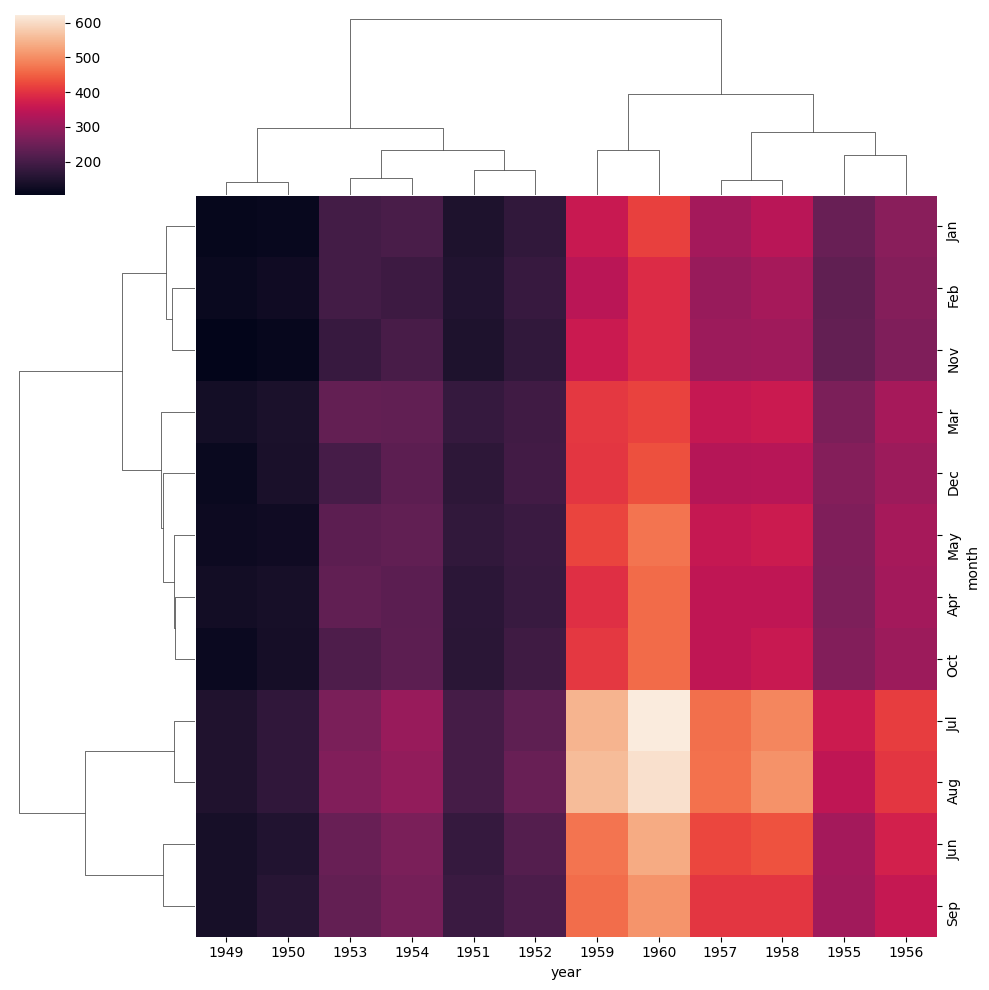

In [74]:
sns.clustermap(flights.pivot_table(values='passengers',index='month',columns='year',observed=False))

# WHEN IN THE GIVEN DATASET cols are Numerical - Categorical

In [76]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# The default .mean() tries to calculate the mean for all columns, but object (string) columns cause issues.
# numeric_only=True ensures that only numeric columns (like 'Survived') are considered.

In [101]:
(titanic.groupby('Embarked').mean(numeric_only=True)['Survived']*100)

Embarked
C    39.215686
Q    52.173913
S    32.592593
Name: Survived, dtype: float64

<Axes: xlabel='Embarked', ylabel='Survived'>

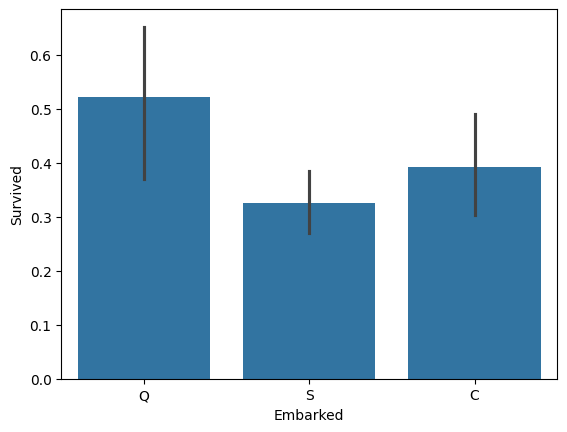

In [79]:
sns.barplot(x=titanic['Embarked'],y=titanic['Survived'])

<Axes: xlabel='Pclass', ylabel='Age'>

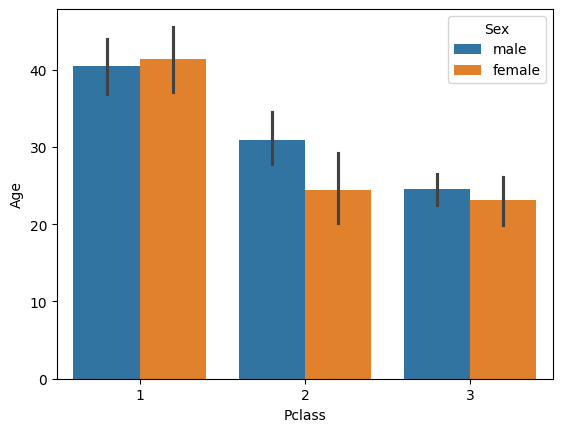

In [82]:
sns.barplot(x=titanic['Pclass'],y=titanic['Age'],hue=titanic['Sex'])

<Axes: xlabel='Sex', ylabel='Age'>

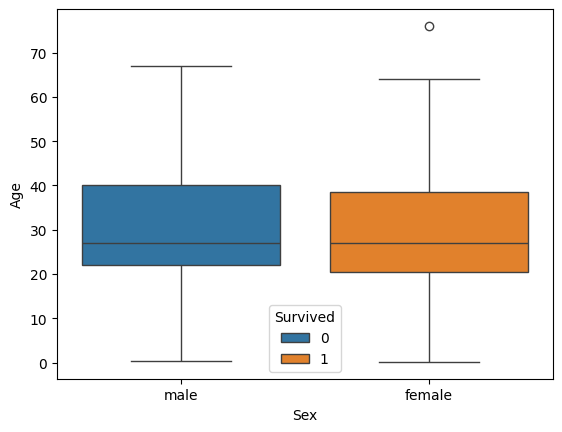

In [84]:
# BOXPLOT
sns.boxplot(x=titanic['Sex'],y=titanic['Age'],hue=titanic['Survived'])

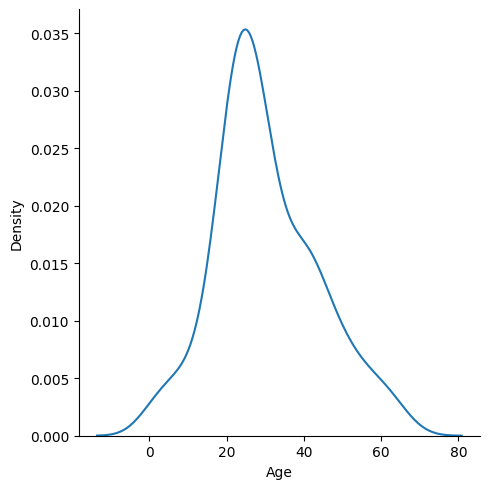

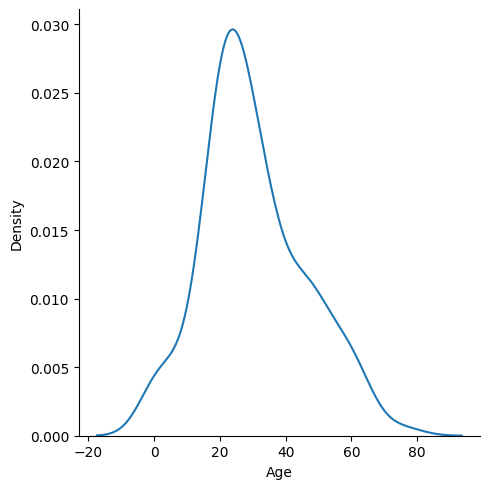

In [96]:
# DISTPLOT
# sns.displot(titanic[x==titanic['Survived']==0],['Age'],hist=False)
sns.displot(titanic[titanic['Survived']==0]['Age'],kind="kde")
sns.displot(titanic[titanic['Survived']==1]['Age'],kind="kde")


<Axes: xlabel='Age', ylabel='Density'>

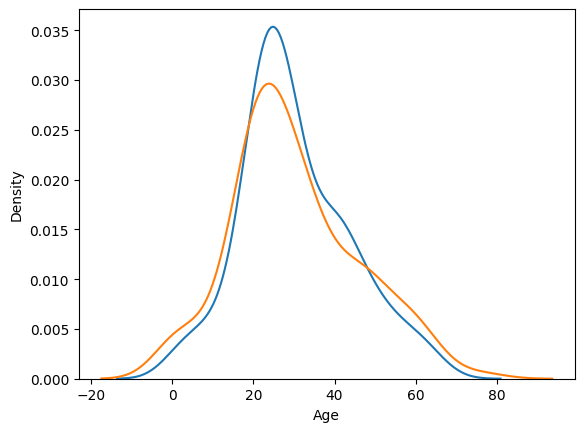

In [97]:
sns.kdeplot(titanic[titanic['Survived'] == 0]['Age'], label="Did Not Survive")
sns.kdeplot(titanic[titanic['Survived'] == 1]['Age'], label="Survived")


<Axes: xlabel='Survived', ylabel='Pclass'>

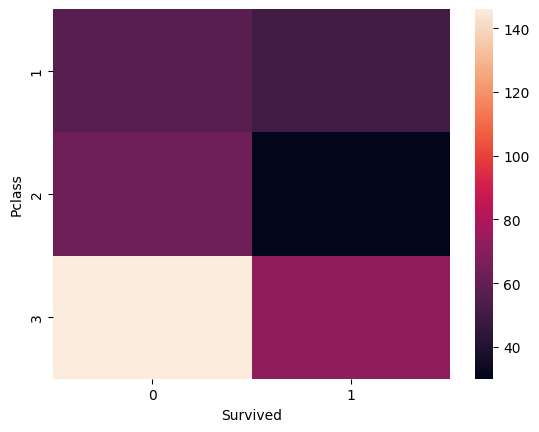

In [98]:
# WHEN IN THE GIVEN DATASET both Categorical --> HEATMAP or CLUSTERMAP
sns.heatmap(pd.crosstab(titanic['Pclass'],titanic['Survived']))



# When to Use?
# Exploring patterns in high-dimensional data.
# Understanding group similarities in datasets.
# Finding hidden structures in large datasets.


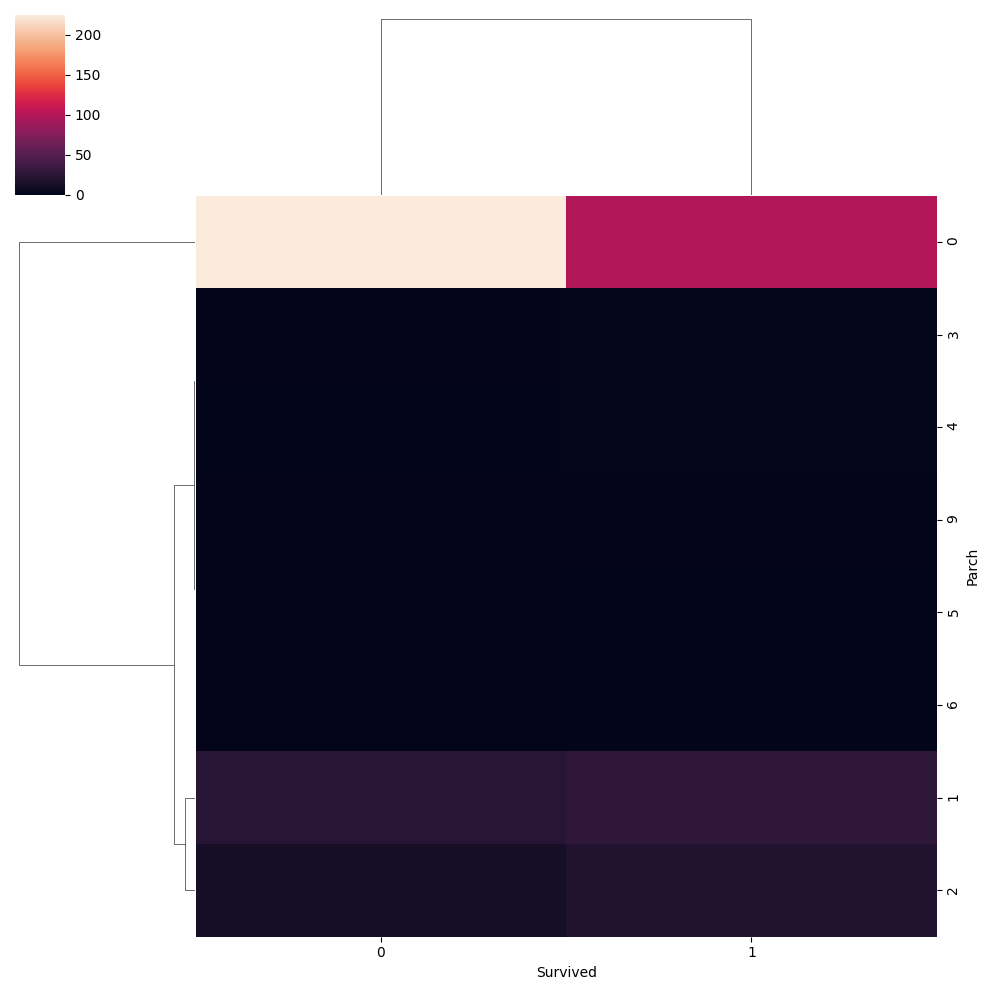

In [100]:
sns.clustermap(pd.crosstab(titanic['Parch'],titanic['Survived']))
